# Самостоятельное задание

Загрузить изображение с белым фоном и черными линиями на нем, создать бинарное изображение и вывести на экран количество линий на изображении, а также найти центральную точку каждой линии и вывести координаты этих точек на экран.

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Загружаем изображение и преобразуем в градации серого. 

In [20]:
img = cv2.imread('bin.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Находим контуры на бинарном изображении.

In [21]:
ret, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [22]:
print('Number of lines:', len(contours))

Number of lines: 11


Находим центральные точки каждой линии.

Формула для нахождения координат центра масс контура в двумерном пространстве:
$$ cX = \frac{M_{10}}{M_{00}} $$
$$ cY = \frac{M_{01}}{M_{00}} $$

где $ M_{00}, M_{10}$ и $M_{01}$ - это нормализованные моменты контура первого и нулевого порядка.

In [23]:
for i, contour in enumerate(contours):
    moments = cv2.moments(contour)
    cX = int(moments["m10"] / moments["m00"])
    cY = int(moments["m01"] / moments["m00"])
    print(f'Line {i+1}: ({cX}, {cY})')

Line 1: (299, 81)
Line 2: (271, 81)
Line 3: (242, 81)
Line 4: (213, 81)
Line 5: (183, 81)
Line 6: (154, 81)
Line 7: (124, 81)
Line 8: (95, 81)
Line 9: (66, 81)
Line 10: (36, 81)
Line 11: (7, 81)


Визуализируем контуры и выводим изображения.

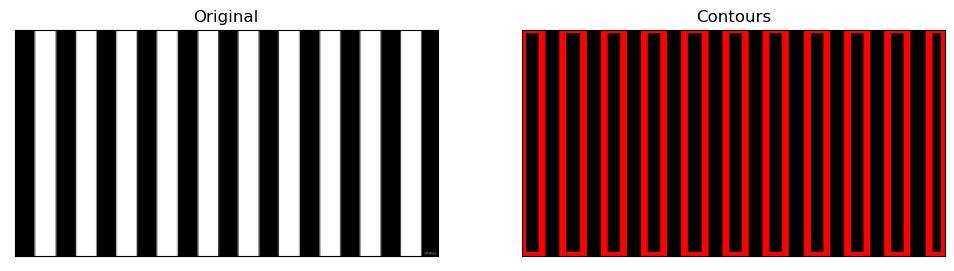

In [45]:
img_contours = np.zeros_like(img)
cv2.drawContours(img_contours, contours, -1, 255, 3)

plt.figure(figsize=(12,6))
plt.subplot(121) plt.imshow(img) plt.title('Original')
plt.xticks([]) plt.yticks([])

plt.subplot(122) plt.imshow(img_contours) plt.title('Contours')
plt.xticks([]) plt.yticks([])

plt.show()